# Context

В этом соревновании нужно было определить кто выжил при крушении лайнера. Данные синтетические но похожи на те, что были у Титаника. Сами данные отсюда: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data

# Data quality assessment

In [1]:
# Подключаем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем данные
df = pd.read_csv('train.csv', index_col=0)
print(df.shape)
df.head(5)

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


100000 пассажиров! Большой кораблик

In [3]:
# типы данных
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Вроде все числа прочитались как числа - все ок

In [4]:
# Проверим на дубли
dups = df[df.duplicated()]
print(dups.shape)

(0, 11)


In [5]:
# Полных дублей нет, проверим как там с однофамильцами
dups = df[df.duplicated(subset=['Name'], keep=False)]
print(dups.shape)
dups.sort_values('Name').head(10)

(12760, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
83433,0,1,"Abbott, Steven",male,62.0,1,1,C.A. 415184,81.79,A15776,S
43514,0,3,"Abbott, Steven",male,39.0,0,0,44125,23.38,NaN,S
11074,0,3,"Acevedo, James",male,51.0,0,0,NaN,29.08,NaN,S
40840,0,1,"Acevedo, James",male,NaN,0,0,420535,102.87,A10333,S
39910,0,3,"Acosta, David",male,23.0,0,0,30739,12.56,NaN,S
47172,0,1,"Acosta, David",male,40.0,0,0,444308,90.82,B21005,Q
2441,0,3,"Adams, Andres",male,38.0,0,0,9234,7.32,NaN,S
9649,0,1,"Adams, Andres",male,39.0,1,0,204626,13.06,NaN,Q
65557,0,3,"Adams, Anthony",male,52.0,0,0,SC/AH 4156058,7.09,NaN,S


куча однофамильцев, но это разные люди судя по всему а не ошибка

In [6]:
# проверим наши категории
print(df['Sex'].unique())
print(df['Embarked'].unique())
print(df['Survived'].unique())
print(df['Pclass'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[1 0]
[1 3 2]


вроде ничего лишнего, в столбце Embarked данные неполные

# Data exploration

In [29]:
# знакомимся с данными
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


## Survived

Наша целевая переменная. Означает кто выжил. 
1 - Да 
0 - Нет

<AxesSubplot:xlabel='Survived', ylabel='count'>

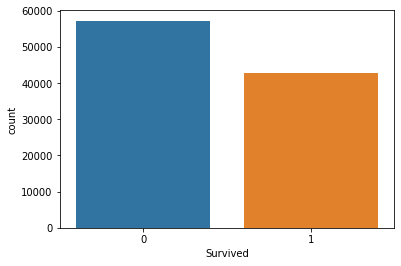

In [7]:
sns.countplot(x=df['Survived'])

In [8]:
print(f"Выжило {df['Survived'].mean()*100}%")

Выжило 42.774%


## Pclass

Класс билета, 1 самый дорогой.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

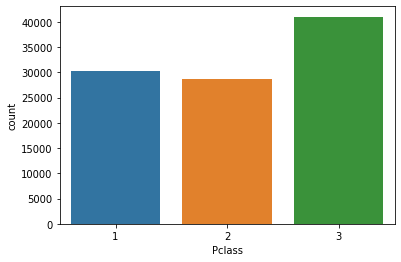

In [9]:
# Распределение по классам
sns.countplot(x=df['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

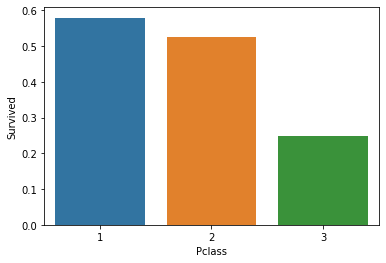

In [17]:
# Есть ли зависимость выживания от класса?
stats = df.groupby('Pclass').mean()
sns.barplot(x=stats['Survived'].index, y=stats['Survived'])

Зависимость есть, из третьего класса меньше четверти выжило.

## Sex
Пол пассажира

<AxesSubplot:xlabel='Sex', ylabel='count'>

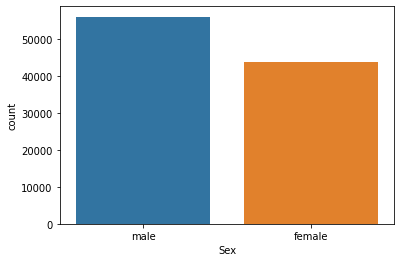

In [19]:
# Половой состав пассажиров
sns.countplot(x=df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

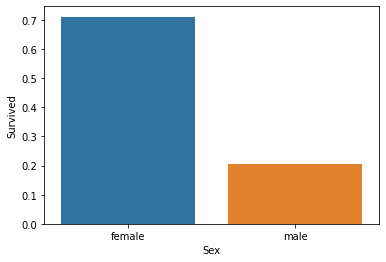

In [18]:
# Есть ли зависимость выживания от пола?
stats = df.groupby('Sex').mean()
sns.barplot(x=stats['Survived'].index, y=stats['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

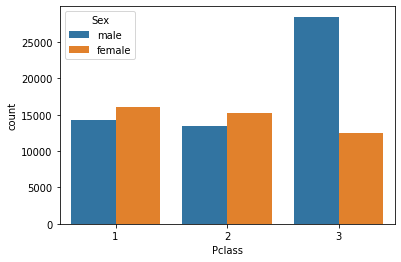

In [23]:
# В каком классе больше женщин было?
sns.countplot(x="Pclass", hue="Sex", data=df)

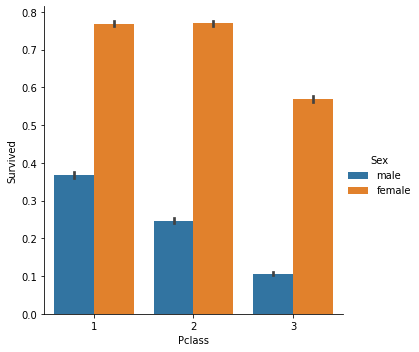

In [25]:
# Шансы на выживание в зависимости от пола и класса:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df, kind='bar')

Как и ожидалось лучше быть женщиной 1 класса чем мужчиной третьего

## Name

Не могу придумать никаких гипотез про имена которые стоило бы проверять.

In [14]:
# Ну разве что можно проверить есть ли анонимусы
anons = df[df['Name'].isna()]
print(anons.shape[0])
# И пустые строки вместо имен
empty = df[df['Name'].str.len() < 5]
print(empty.shape[0])

0
0


## Age

Возраст

In [27]:
# Проверим на пустые значения
eternals = df[df['Age'].isna()]
mortals = df[df['Age'].notna()]
print(eternals.shape[0])

3292


In [41]:
# что-то особенное про людей без возраста?
stats = eternals.describe().loc['mean']-df.describe().loc['mean']
stats

Survived   -0.015832
Pclass      0.020672
Age              NaN
SibSp      -0.016159
Parch      -0.021085
Fare       -0.321204
Name: mean, dtype: float64

Вроде ничем они не примечательны, скорее всего системы в отсутствии данных нет

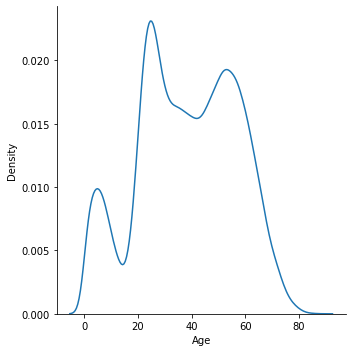

In [49]:
# распределение по возрастам
sns.displot(mortals['Age'],  kind="kde")

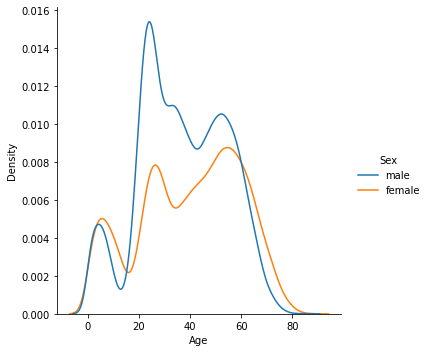

In [58]:
# распределение по возрастам и полу
sns.displot(data=mortals, x='Age', hue='Sex', kind="kde")

Молодых мужчин почему-то больше, это команда корабля?

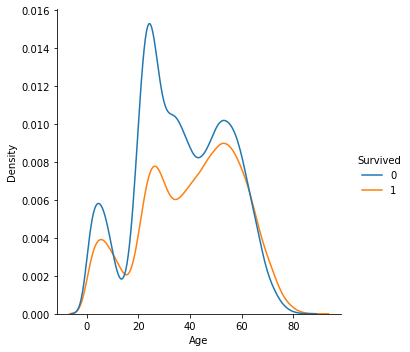

In [51]:
# выживание от возраста
sns.displot(data=mortals, x='Age', hue='Survived', kind="kde")

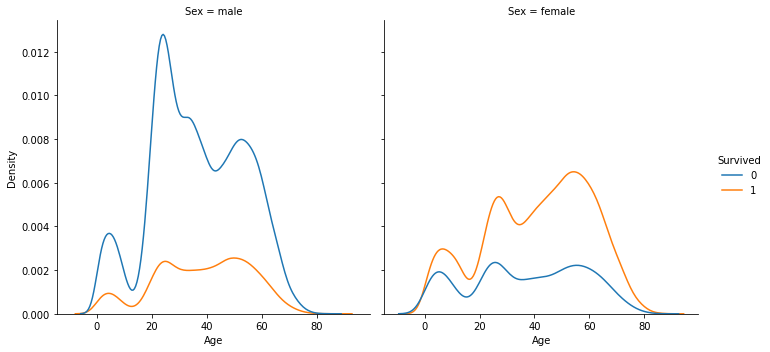

In [52]:
# выживание от возраста и пола
sns.displot(data=mortals, x='Age', hue='Survived', col="Sex", kind="kde")

даже для детей пол важен был!
А молодым мужчинам вообще без вариантов

## SibSp

братья/сестры/супруги на борту

<AxesSubplot:xlabel='SibSp', ylabel='count'>

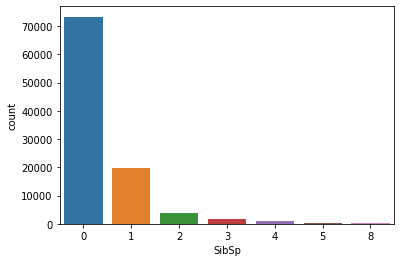

In [53]:
# Сколько их вообще?
sns.countplot(x=df['SibSp'])

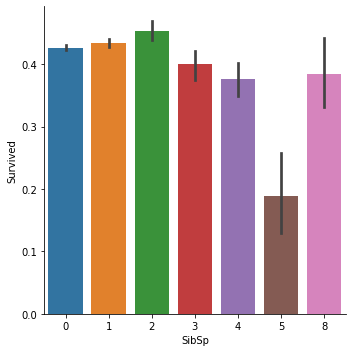

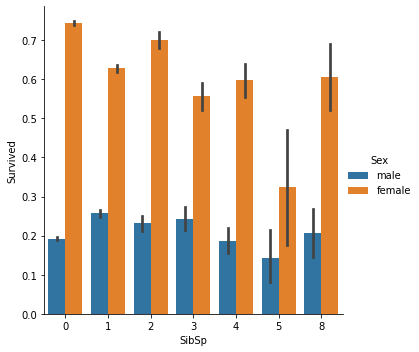

In [55]:
# Есть польза от них?
sns.catplot(x="SibSp", y="Survived", data=df, kind='bar')
sns.catplot(x="SibSp", y="Survived", hue="Sex", data=df, kind='bar')

## parch

Родители/дети

<AxesSubplot:xlabel='Parch', ylabel='count'>

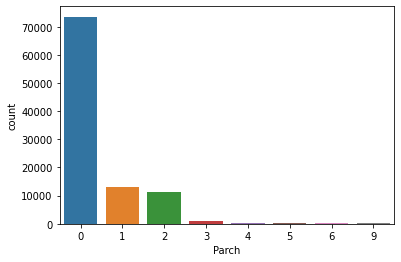

In [60]:
# Сколько их вообще?
sns.countplot(x=df['Parch'])

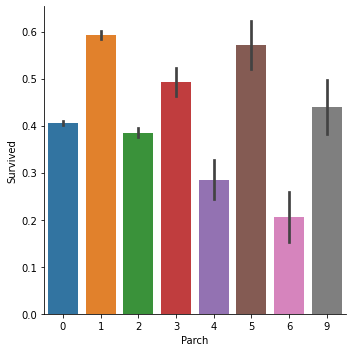

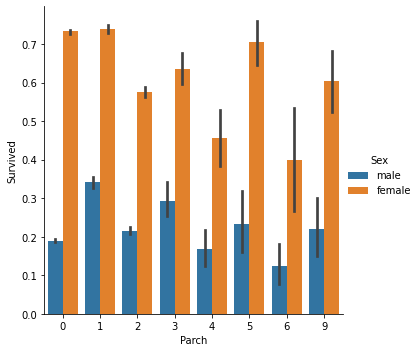

In [61]:
# Есть польза от них?
sns.catplot(x="Parch", y="Survived", data=df, kind='bar')
sns.catplot(x="Parch", y="Survived", hue="Sex", data=df, kind='bar')

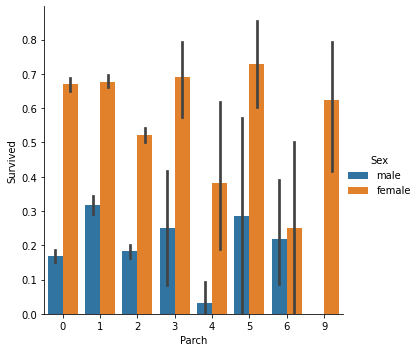

In [65]:
# Как там дети без родителей?
childrens = mortals[mortals['Age'] < 17]
sns.catplot(x="Parch", y="Survived", hue="Sex", data=childrens, kind='bar')

Почему-то девочки в двумя родителями меньше выживали.

## Ticket

номер билета, нет идей как это могло на что-то повлиять

In [69]:
# Ну разве что можно проверить есть ли пустые
no_ticket = df[df['Ticket'].isna()]
print(anons.shape[0])
# И пустые строки 
empty = df[df['Ticket'].str.len() < 2]
print(empty.shape[0])

0
0


## Embarked

Порт посадки

<AxesSubplot:xlabel='Embarked', ylabel='count'>

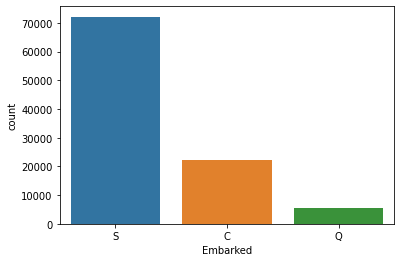

In [75]:
# откуда все эти люди?
sns.countplot(x=df['Embarked'])

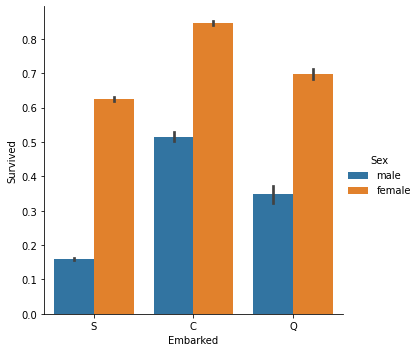

In [77]:
# повлиял ли порт посадки на судьбу?
sns.catplot(x="Embarked", y="Survived", data=df, hue="Sex", kind='bar')

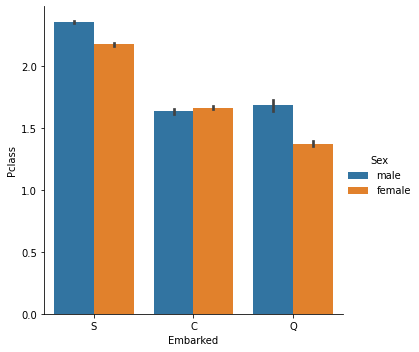

In [78]:
# может класс разный был
sns.catplot(x="Embarked", y="Pclass", data=df, hue="Sex", kind='bar')

Угадал!

## Fare

цена на билет

In [80]:
# нет данных?
no_ticket = df[df['Fare'].isna()]
have_ticket = df[df['Fare'].notna()]

print(no_ticket.shape[0])
no_ticket.head(5)

134


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
39,1,2,"Cultice, May",female,61.0,0,0,10193,NaN,NaN,S
1404,1,1,"Kerr, Maryann",female,55.0,0,0,15792,NaN,C5721,C
1909,1,2,"Thomas, Jennifer",female,22.0,0,0,12598,NaN,NaN,Q
1999,0,3,"Flatley, Trena",female,3.0,1,2,457224,NaN,NaN,S
3885,1,1,"Harding, Lillian",female,48.0,1,2,14367,NaN,B7243,C


их очень мало, можно просто их не учитывать

In [74]:
# были бесплатные?
free_ticket = df[df['Fare'] == 0]
print(free_ticket.shape[0])

0


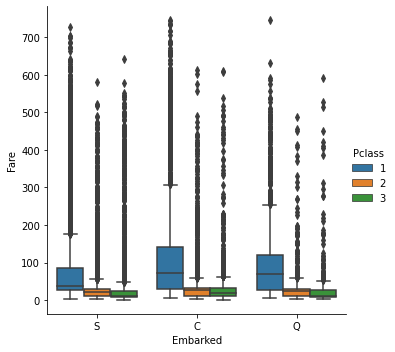

In [82]:
# Почем нынче прокатиться?
sns.catplot(x="Embarked", y="Fare", hue="Pclass", data=have_ticket, kind='box')

In [95]:
# что-то тут не так с ценами
big_fare = have_ticket[(have_ticket['Fare']>100) & (have_ticket['Pclass']==3)]
print(big_fare.shape[0])
big_fare.head(10)

446


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
155,0,3,"Bradley, Darren",male,21.0,1,0,313459,137.11,NaN,S
600,0,3,"Montero, Melissa",female,23.0,0,1,9442,408.47,NaN,S
849,0,3,"Webb, Timothy",male,51.0,1,4,13295,199.53,NaN,S
1269,0,3,"Murray, Elizabeth",female,46.0,2,2,393632,191.22,A9773,S
2020,0,3,"Barnes, Peter",male,47.0,0,0,28703,163.44,NaN,S
2177,1,3,"Wallace, Stanley",male,36.0,0,0,10852,258.36,C11952,C
2297,0,3,"Calderon, David",male,50.0,0,0,26370,282.78,NaN,S
2316,1,3,"Alonzo, Irene",female,55.0,2,5,PP 437094,281.13,NaN,C
3469,1,3,"Lamb, Hector",male,57.0,0,0,19504,244.15,NaN,S


Я бы выбросил этот столбец из анализа, данные тут не внушают доверия. Ну или отфильтровать как-то.

## Cabin

Номер каюты

In [85]:
# нет данных?
no_cabin = df[df['Cabin'].isna()]
have_cabin = df[df['Cabin'].notna()]
no_cabin.shape[0]

67866

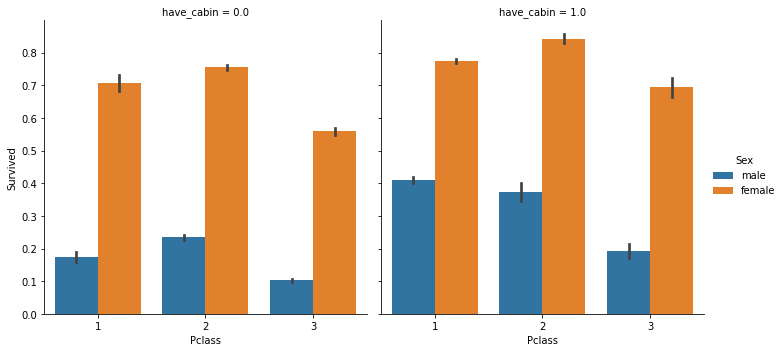

In [93]:
# Большинство без номера каюты, почему же так?
# Влияет ли это?
df.loc[df['Cabin'].notna(),'have_cabin'] = 1
df.loc[df['Cabin'].isna(),'have_cabin'] = 0
sns.catplot(x="Pclass", y="Survived", hue="Sex", col='have_cabin', data=df, kind='bar')

Очень сильно, почему же?

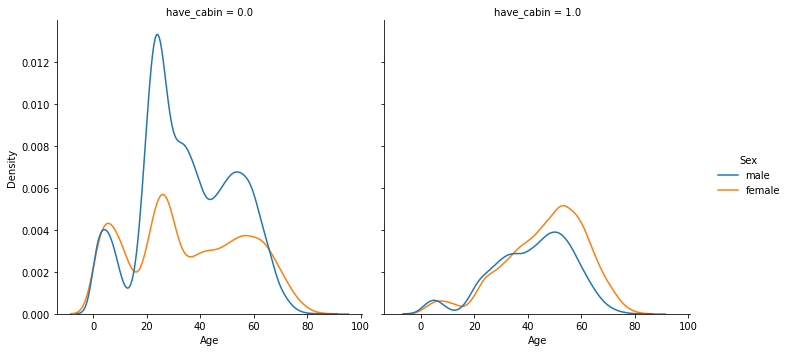

In [97]:
# Кто ездил в каюте?
sns.displot(data=df, x='Age', hue='Sex', col='have_cabin', kind="kde")

Очевидно совсем другие люди

# Summary

На первый поверхностный взгляд на выживание влияет пол, возраст, класс билета, наличие каюты и близкие.
Данные по цене на билет требуют либо фильтрации, либо не стоит их учитывать вообще т.к. много ошибок.
